# * **Introduction**

**Avocado is one of the fruits that most vegetarians love.Today we will do an analysis of the avocado price data.**

# * **Data**

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on [their website](https://hassavocadoboard.com/):

Some relevant columns in the dataset:

Date - The date of the observation.

AveragePrice - the average price of a single avocado.

type - conventional or organic.

year - the year.

Region - the city or region of the observation.

Total Volume - Total number of avocados sold.

4046 - Total number of avocados with PLU 4046 sold.

4225 - Total number of avocados with PLU 4225 sold.

4770 - Total number of avocados with PLU 4770 sold.


# * **Let's Start**

**First we will import libraries and read data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/mohammedalmishal/avocado/main/avocado.csv')

show data

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.shape

(18249, 14)

**Now let's describe data**

In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


**The first column is index so we drop it to get clean data.**

In [8]:
df = df.drop('Unnamed: 0', axis = 1)

# *  **Missing Data**

**let's show if there are missing data or not**.

In [9]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**Great there are no missing data this make work easy and accurate.**

# *  **data visualization**
**we will focus on Average Price and find relationship between it and other feature .**

  **so first let's show distribution to understand values .**

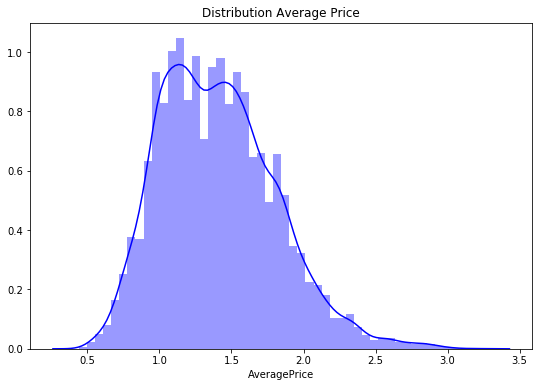

In [10]:
plt.figure(figsize = (9,6))
plt.title('Distribution Average Price')
sns.distplot(df['AveragePrice'], color = 'b')

**It appears that the data distribution in the average price ranges between 0.3 & 3.4
The upper values of the distribution are at 1.1
Most of the data is concentrated between 0.9 to 1.8**.

**There are two types of avocados in the data: organic and conventional, so let's see how many each one.**

The number of each type  conventional    9126
organic         9123
Name: type, dtype: int64


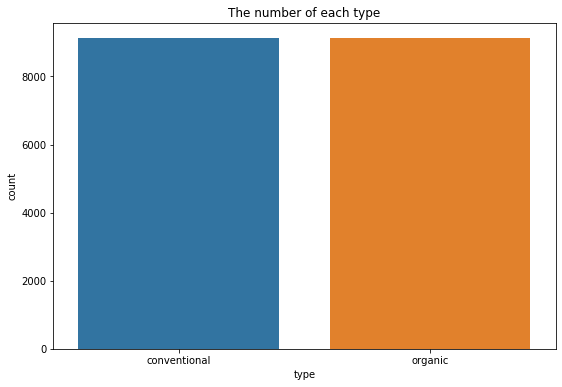

In [11]:
print('The number of each type ',df['type'].value_counts())
plt.figure(figsize =(9,6))
plt.title('The number of each type')
sns.countplot('type', data = df)

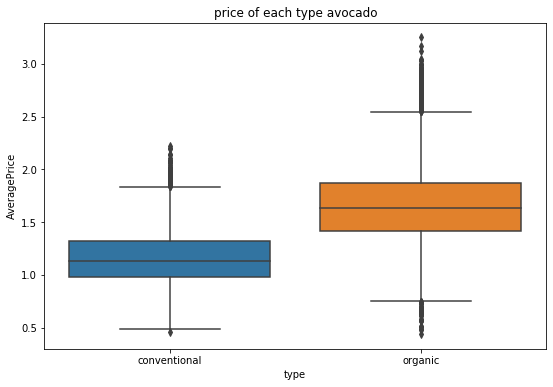

In [12]:
plt.figure(figsize = (9,6))
plt.title('price of each type avocado')
sns.boxplot(x= 'type', y = 'AveragePrice', data = df)

**It looks like the ORGANIC price is more than the conventional price. **

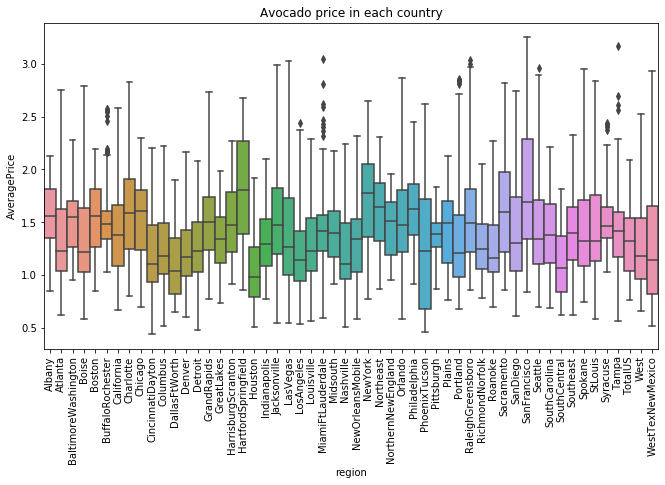

In [13]:
plt.figure(figsize =(11,6))
plt.title('Avocado price in each country')
plt.xticks(rotation ='vertical')
sns.boxplot(x = 'region', y = 'AveragePrice', data = df, width = 1, whis= 2)

**Regarding the prices relative to the regions, we find that San Francisco is the most expensive city to sell avocados in general, Houston is the cheapest area to sell**

**Now let's play a little bit with the data
We will isolate the data according to the type of avocado and then take each type to find its prices according to the region and year. To clarify more, let's work**

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


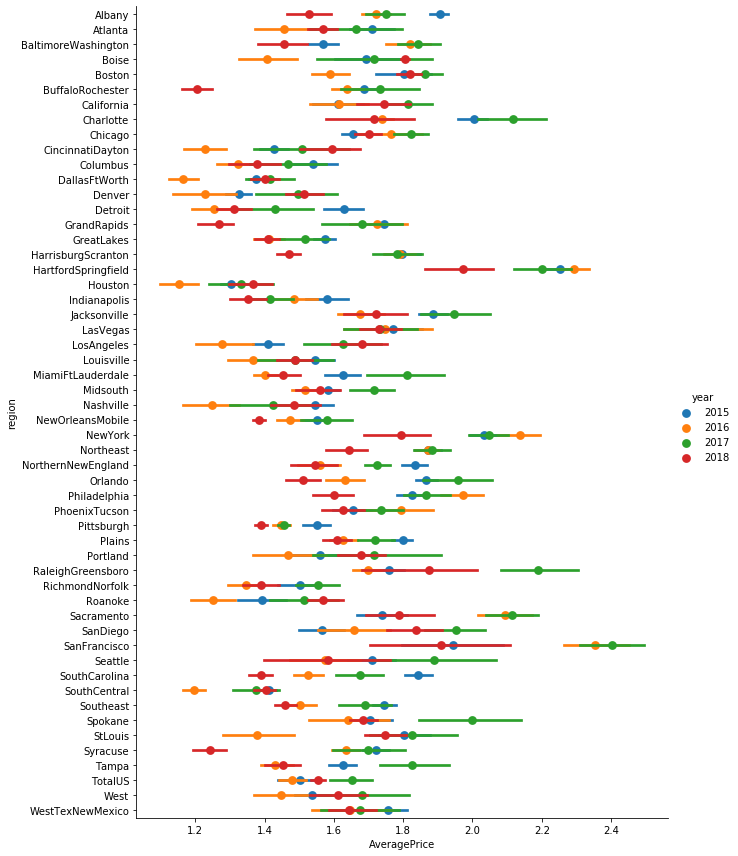

In [14]:
organic = df[df['type'] == 'organic']
sns.factorplot(x = 'AveragePrice', y = 'region', hue = 'year', data = organic , size=12 , aspect=0.8
               , join=False)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


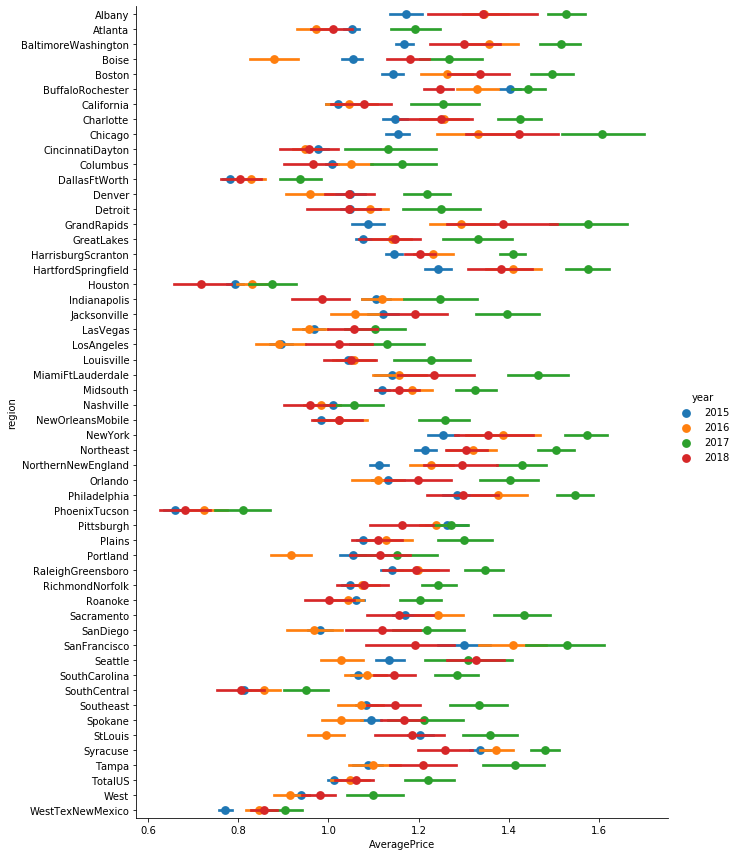

In [15]:
conventional = df[df['type'] == 'conventional']
sns.factorplot(x = 'AveragePrice', y = 'region', hue = 'year', data = conventional , size=12 , aspect=0.8
               , join=False)

**When data is segmented by type
We found that the lowest prices conventional are in Phoenix
and the expensivest city is chicago**

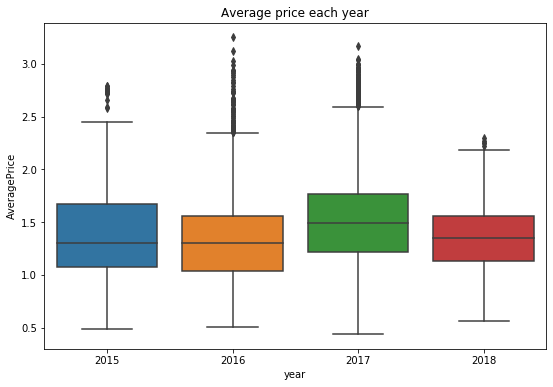

In [16]:
plt.figure(figsize = (9,6))
plt.title('Average price each year')
sns.boxplot(x = 'year', y= 'AveragePrice', data = df)

**The year 2017 was full of expense :)**

**Now we will find the relationship between price and months, since we have the date, we can extract the months to find the relationship with prices..**

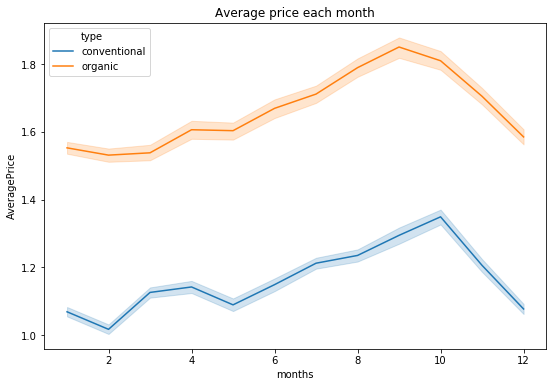

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df["months"] = df['Date'].map(lambda x: x.month)
plt.figure(figsize = (9,6))
plt.title('Average price each month')
sns.lineplot(x = 'months', y = 'AveragePrice' , data = df, hue = 'type')

**as I expected ! There is an increase in some months and a decrease in others, and in both types. It seems that this thing makes us think of something else to envision each season of the year**

In [18]:
seasons = {1: 'winter', 4: 'Autumn', 3: 'summer', 2: 'spring'}
df['seasons'] = [(month%12 + 3)//3 for month in df['months']]
df.seasons = [seasons[i] for i in df.seasons]

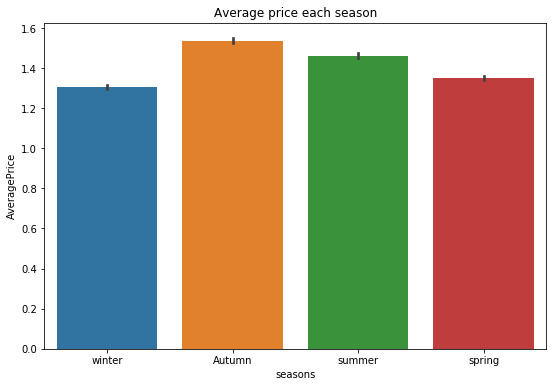

In [19]:
plt.figure(figsize = (9,6))
plt.title('Average price each season')
sns.barplot(x = 'seasons', y= 'AveragePrice', data = df)

**The rise is clear in the fall and the down in the winter**

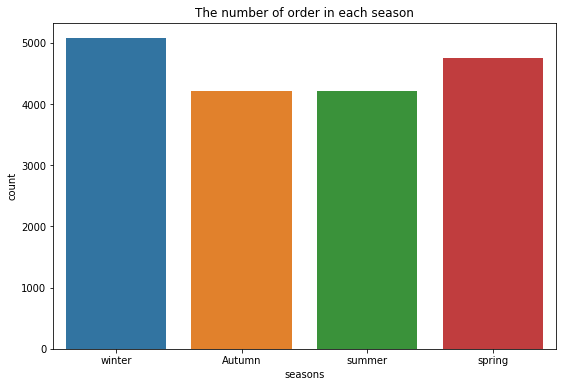

In [20]:
plt.figure(figsize = (9,6))
plt.title('The number of order in each season')
sns.countplot(x = 'seasons', data = df)

**Finally let's find heatmap**

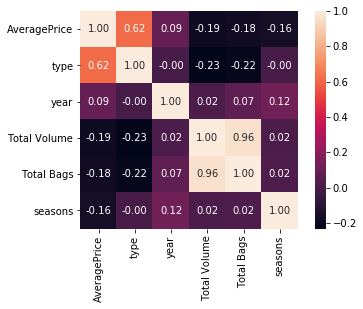

In [21]:
from sklearn.preprocessing import LabelEncoder
objectt = LabelEncoder()
di = {}

objectt.fit(df.type.drop_duplicates()) 
di['type'] = list(objectt.classes_)
df.type = objectt.transform(df.type) 

di2 = {}
objectt2 = LabelEncoder()
objectt2.fit(df.seasons.drop_duplicates()) 
di2['seasons'] = list(objectt2.classes_)
df.seasons = objectt2.transform(df.seasons) 

cols = ['AveragePrice','type','year','Total Volume','Total Bags', 'seasons']
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, cbar = True, fmt = '.2f', annot = True, square = True
            , yticklabels = cols, xticklabels = cols)